In [124]:
import requests
from bs4 import BeautifulSoup
import os
import statsmodels.api as sm 
import missingno as ms
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm 
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression  
from sklearn import metrics, datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import sklearn.discriminant_analysis as DA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore')

In [125]:
#2010 college data
rbu10 = pd.read_excel("/Users/rickykuehn/Desktop/UCLA/Intensive/Capstone Project/College data/college_2010.xlsx")
rbu10['Player'] = rbu10['Player'].str.replace('*','')
rbu10.rename(columns = {'G':'College_G'}, inplace = True)
rbu10 = rbu10.drop(columns=['Rk'])

#2011 combine data
url = 'https://nflcombineresults.com/nflcombinedata_expanded.php?year=2011&pos=RB&college='
response = requests.get(url)
response.content                
soup = BeautifulSoup(response.text)
rbcombine2011 = soup.find('table')
rbc11 = pd.read_html(str(rbcombine2011))[0]
rbc11.rename(columns = {'Name':'Player'}, inplace = True)

#2011 NFLr data
NFL11 = pd.read_excel("/Users/rickykuehn/Desktop/UCLA/Intensive/Capstone Project/NFL rushing data/NFLr_11.xlsx")
NFL11['Player'] = NFL11['Player'].str.replace('*','')
NFL11['Player'] = NFL11['Player'].str.replace('+','')
NFL11.rename(columns = {'Tm':'NFL_Tm'}, inplace = True)
NFL11.rename(columns = {'G':'NFL_G'}, inplace = True)
NFL11.rename(columns = {'GS':'NFL_GS'}, inplace = True)
NFL11.rename(columns = {'Att':'NFL_Att'}, inplace = True)
NFL11.rename(columns = {'Yds':'NFL_Yds'}, inplace = True)
NFL11.rename(columns = {'TD':'NFL_TD'}, inplace = True)
NFL11.rename(columns = {'1D':'NFL_1D'}, inplace = True)
NFL11.rename(columns = {'Lng':'NFL_Lng'}, inplace = True)
NFL11.rename(columns = {'Y/A':'NFL_Y/A'}, inplace = True)
NFL11.rename(columns = {'Y/G':'NFL_Y/G'}, inplace = True)
NFL11.rename(columns = {'Fmb':'Fmb'}, inplace = True)
NFL11 = NFL11.drop(columns=['Rk'])

#merge 2010 college and 2011 combine
rbu10c11 = pd.merge(rbc11, rbu10, on = 'Player')

#merge college/combine with 2011 NFLr
rb_exp2a = pd.merge(rbu10c11, NFL11, on = 'Player')
rb_exp2a.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18 entries, 0 to 17
Data columns (total 44 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Year             18 non-null     float64
 1   Player           18 non-null     object 
 2   College          18 non-null     object 
 3   POS              18 non-null     object 
 4   Height (in)      18 non-null     float64
 5   Weight (lbs)     18 non-null     float64
 6   Hand Size (in)   18 non-null     float64
 7   Arm Length (in)  18 non-null     float64
 8   Wonderlic        0 non-null      float64
 9   40 Yard          18 non-null     float64
 10  Bench Press      17 non-null     float64
 11  Vert Leap (in)   17 non-null     float64
 12  Broad Jump (in)  17 non-null     float64
 13  Shuttle          17 non-null     float64
 14  3Cone            17 non-null     float64
 15  60Yd Shuttle     6 non-null      float64
 16  School           18 non-null     object 
 17  Conf             1

In [126]:
#2011 college data
rbu11 = pd.read_excel("/Users/rickykuehn/Desktop/UCLA/Intensive/Capstone Project/College data/college_2011.xlsx")
rbu11['Player'] = rbu11['Player'].str.replace('*','')
rbu11.rename(columns = {'G':'College_G'}, inplace = True)
rbu11 = rbu11.drop(columns=['Rk'])

#2012 combine data
url = 'https://nflcombineresults.com/nflcombinedata_expanded.php?year=2012&pos=RB&college='
response = requests.get(url)
response.content                
soup = BeautifulSoup(response.text)
rbcombine2012 = soup.find('table')
rbc12 = pd.read_html(str(rbcombine2012))[0]
rbc12.rename(columns = {'Name':'Player'}, inplace = True)

#2012 NFLr data
NFL12 = pd.read_excel("/Users/rickykuehn/Desktop/UCLA/Intensive/Capstone Project/NFL rushing data/NFLr_12.xlsx")
NFL12['Player'] = NFL12['Player'].str.replace('*','')
NFL12['Player'] = NFL12['Player'].str.replace('+','')
NFL12.rename(columns = {'Tm':'NFL_Tm'}, inplace = True)
NFL12.rename(columns = {'G':'NFL_G'}, inplace = True)
NFL12.rename(columns = {'GS':'NFL_GS'}, inplace = True)
NFL12.rename(columns = {'Att':'NFL_Att'}, inplace = True)
NFL12.rename(columns = {'Yds':'NFL_Yds'}, inplace = True)
NFL12.rename(columns = {'TD':'NFL_TD'}, inplace = True)
NFL12.rename(columns = {'1D':'NFL_1D'}, inplace = True)
NFL12.rename(columns = {'Lng':'NFL_Lng'}, inplace = True)
NFL12.rename(columns = {'Y/A':'NFL_Y/A'}, inplace = True)
NFL12.rename(columns = {'Y/G':'NFL_Y/G'}, inplace = True)
NFL12.rename(columns = {'Fmb':'Fmb'}, inplace = True)
NFL12 = NFL12.drop(columns=['Rk'])

#merge 2011 college and 2012 combine
rbu11c12 = pd.merge(rbc12, rbu11, on = 'Player')

#merge college/combine with 2012 NFLr
rb_exp2b = pd.merge(rbu11c12, NFL12, on = 'Player')
rb_exp2b.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15 entries, 0 to 14
Data columns (total 44 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Year             15 non-null     float64
 1   Player           15 non-null     object 
 2   College          15 non-null     object 
 3   POS              15 non-null     object 
 4   Height (in)      15 non-null     float64
 5   Weight (lbs)     15 non-null     float64
 6   Hand Size (in)   15 non-null     float64
 7   Arm Length (in)  15 non-null     float64
 8   Wonderlic        0 non-null      float64
 9   40 Yard          15 non-null     float64
 10  Bench Press      12 non-null     float64
 11  Vert Leap (in)   14 non-null     float64
 12  Broad Jump (in)  13 non-null     float64
 13  Shuttle          13 non-null     float64
 14  3Cone            13 non-null     float64
 15  60Yd Shuttle     5 non-null      float64
 16  School           15 non-null     object 
 17  Conf             1

In [127]:
#2012 college data
rbu12 = pd.read_excel("/Users/rickykuehn/Desktop/UCLA/Intensive/Capstone Project/College data/college_2012.xlsx")
rbu12['Player'] = rbu12['Player'].str.replace('*','')
rbu12.rename(columns = {'G':'College_G'}, inplace = True)
rbu12 = rbu12.drop(columns=['Rk'])

#2013 combine data
url = 'https://nflcombineresults.com/nflcombinedata_expanded.php?year=2013&pos=RB&college='
response = requests.get(url)
response.content                
soup = BeautifulSoup(response.text)
rbcombine2013 = soup.find('table')
rbc13 = pd.read_html(str(rbcombine2013))[0]
rbc13.rename(columns = {'Name':'Player'}, inplace = True)

#2013 NFLr data
NFL13 = pd.read_excel("/Users/rickykuehn/Desktop/UCLA/Intensive/Capstone Project/NFL rushing data/NFLr_13.xlsx")
NFL13['Player'] = NFL13['Player'].str.replace('*','')
NFL13['Player'] = NFL13['Player'].str.replace('+','')
NFL13.rename(columns = {'Tm':'NFL_Tm'}, inplace = True)
NFL13.rename(columns = {'G':'NFL_G'}, inplace = True)
NFL13.rename(columns = {'GS':'NFL_GS'}, inplace = True)
NFL13.rename(columns = {'Att':'NFL_Att'}, inplace = True)
NFL13.rename(columns = {'Yds':'NFL_Yds'}, inplace = True)
NFL13.rename(columns = {'TD':'NFL_TD'}, inplace = True)
NFL13.rename(columns = {'1D':'NFL_1D'}, inplace = True)
NFL13.rename(columns = {'Lng':'NFL_Lng'}, inplace = True)
NFL13.rename(columns = {'Y/A':'NFL_Y/A'}, inplace = True)
NFL13.rename(columns = {'Y/G':'NFL_Y/G'}, inplace = True)
NFL13.rename(columns = {'Fmb':'Fmb'}, inplace = True)
NFL13 = NFL13.drop(columns=['Rk'])

#merge 2012 college and 2013 combine
rbu12c13 = pd.merge(rbc13, rbu12, on = 'Player')

#merge college/combine with 2013 NFLr
rb_exp2c = pd.merge(rbu12c13, NFL13, on = 'Player')
rb_exp2c.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21 entries, 0 to 20
Data columns (total 44 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Year             21 non-null     float64
 1   Player           21 non-null     object 
 2   College          21 non-null     object 
 3   POS              21 non-null     object 
 4   Height (in)      21 non-null     float64
 5   Weight (lbs)     21 non-null     float64
 6   Hand Size (in)   21 non-null     float64
 7   Arm Length (in)  21 non-null     float64
 8   Wonderlic        3 non-null      float64
 9   40 Yard          21 non-null     float64
 10  Bench Press      18 non-null     float64
 11  Vert Leap (in)   21 non-null     float64
 12  Broad Jump (in)  20 non-null     float64
 13  Shuttle          19 non-null     float64
 14  3Cone            20 non-null     float64
 15  60Yd Shuttle     7 non-null      float64
 16  School           21 non-null     object 
 17  Conf             2

In [128]:
#2013 college data
rbu13 = pd.read_excel("/Users/rickykuehn/Desktop/UCLA/Intensive/Capstone Project/College data/college_2013.xlsx")
rbu13['Player'] = rbu13['Player'].str.replace('*','')
rbu13.rename(columns = {'G':'College_G'}, inplace = True)
rbu13 = rbu13.drop(columns=['Rk'])

#2014 combine data
url = 'https://nflcombineresults.com/nflcombinedata_expanded.php?year=2014&pos=RB&college='
response = requests.get(url)
response.content                
soup = BeautifulSoup(response.text)
rbcombine2014 = soup.find('table')
rbc14 = pd.read_html(str(rbcombine2014))[0]
rbc14.rename(columns = {'Name':'Player'}, inplace = True)

#2014 NFLr data
NFL14 = pd.read_excel("/Users/rickykuehn/Desktop/UCLA/Intensive/Capstone Project/NFL rushing data/NFLr_14.xlsx")
NFL14['Player'] = NFL14['Player'].str.replace('*','')
NFL14['Player'] = NFL14['Player'].str.replace('+','')
NFL14.rename(columns = {'Tm':'NFL_Tm'}, inplace = True)
NFL14.rename(columns = {'G':'NFL_G'}, inplace = True)
NFL14.rename(columns = {'GS':'NFL_GS'}, inplace = True)
NFL14.rename(columns = {'Att':'NFL_Att'}, inplace = True)
NFL14.rename(columns = {'Yds':'NFL_Yds'}, inplace = True)
NFL14.rename(columns = {'TD':'NFL_TD'}, inplace = True)
NFL14.rename(columns = {'1D':'NFL_1D'}, inplace = True)
NFL14.rename(columns = {'Lng':'NFL_Lng'}, inplace = True)
NFL14.rename(columns = {'Y/A':'NFL_Y/A'}, inplace = True)
NFL14.rename(columns = {'Y/G':'NFL_Y/G'}, inplace = True)
NFL14.rename(columns = {'Fmb':'Fmb'}, inplace = True)
NFL14 = NFL14.drop(columns=['Rk'])

#merge 2013 college and 2014 combine
rbu13c14 = pd.merge(rbc14, rbu13, on = 'Player')

#merge college/combine with 2014 NFLr
rb_exp2d = pd.merge(rbu13c14, NFL14, on = 'Player')
rb_exp2d.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12 entries, 0 to 11
Data columns (total 44 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Year             12 non-null     float64
 1   Player           12 non-null     object 
 2   College          12 non-null     object 
 3   POS              12 non-null     object 
 4   Height (in)      12 non-null     float64
 5   Weight (lbs)     12 non-null     float64
 6   Hand Size (in)   12 non-null     float64
 7   Arm Length (in)  12 non-null     float64
 8   Wonderlic        1 non-null      float64
 9   40 Yard          12 non-null     float64
 10  Bench Press      10 non-null     float64
 11  Vert Leap (in)   12 non-null     float64
 12  Broad Jump (in)  12 non-null     float64
 13  Shuttle          10 non-null     float64
 14  3Cone            9 non-null      float64
 15  60Yd Shuttle     2 non-null      float64
 16  School           12 non-null     object 
 17  Conf             1

In [129]:
#2014 college data
rbu14 = pd.read_excel("/Users/rickykuehn/Desktop/UCLA/Intensive/Capstone Project/College data/college_2014.xlsx")
rbu14['Player'] = rbu14['Player'].str.replace('*','')
rbu14.rename(columns = {'G':'College_G'}, inplace = True)
rbu14 = rbu14.drop(columns=['Rk'])

#2015 combine data
url = 'https://nflcombineresults.com/nflcombinedata_expanded.php?year=2015&pos=RB&college='
response = requests.get(url)
response.content                
soup = BeautifulSoup(response.text)
rbcombine2015 = soup.find('table')
rbc15 = pd.read_html(str(rbcombine2015))[0]
rbc15.rename(columns = {'Name':'Player'}, inplace = True)

#2015 NFLr data
NFL15 = pd.read_excel("/Users/rickykuehn/Desktop/UCLA/Intensive/Capstone Project/NFL rushing data/NFLr_15.xlsx")
NFL15['Player'] = NFL15['Player'].str.replace('*','')
NFL15['Player'] = NFL15['Player'].str.replace('+','')
NFL15.rename(columns = {'Tm':'NFL_Tm'}, inplace = True)
NFL15.rename(columns = {'G':'NFL_G'}, inplace = True)
NFL15.rename(columns = {'GS':'NFL_GS'}, inplace = True)
NFL15.rename(columns = {'Att':'NFL_Att'}, inplace = True)
NFL15.rename(columns = {'Yds':'NFL_Yds'}, inplace = True)
NFL15.rename(columns = {'TD':'NFL_TD'}, inplace = True)
NFL15.rename(columns = {'1D':'NFL_1D'}, inplace = True)
NFL15.rename(columns = {'Lng':'NFL_Lng'}, inplace = True)
NFL15.rename(columns = {'Y/A':'NFL_Y/A'}, inplace = True)
NFL15.rename(columns = {'Y/G':'NFL_Y/G'}, inplace = True)
NFL15.rename(columns = {'Fmb':'Fmb'}, inplace = True)
NFL15 = NFL15.drop(columns=['Rk'])

#merge 2014 college and 2015 combine
rbu14c15 = pd.merge(rbc15, rbu14, on = 'Player')

#merge college/combine with 2015 NFLr
rb_exp2e = pd.merge(rbu14c15, NFL15, on = 'Player')
rb_exp2e.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22 entries, 0 to 21
Data columns (total 44 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Year             22 non-null     float64
 1   Player           22 non-null     object 
 2   College          22 non-null     object 
 3   POS              22 non-null     object 
 4   Height (in)      22 non-null     float64
 5   Weight (lbs)     22 non-null     float64
 6   Hand Size (in)   22 non-null     float64
 7   Arm Length (in)  22 non-null     float64
 8   Wonderlic        4 non-null      float64
 9   40 Yard          22 non-null     float64
 10  Bench Press      21 non-null     float64
 11  Vert Leap (in)   20 non-null     float64
 12  Broad Jump (in)  20 non-null     float64
 13  Shuttle          20 non-null     float64
 14  3Cone            20 non-null     float64
 15  60Yd Shuttle     5 non-null      float64
 16  School           22 non-null     object 
 17  Conf             2

In [130]:
#2015 college data
rbu15 = pd.read_excel("/Users/rickykuehn/Desktop/UCLA/Intensive/Capstone Project/College data/college_2015.xlsx")
rbu15['Player'] = rbu15['Player'].str.replace('*','')
rbu15.rename(columns = {'G':'College_G'}, inplace = True)
rbu15 = rbu15.drop(columns=['Rk'])

#2016 combine data
url = 'https://nflcombineresults.com/nflcombinedata_expanded.php?year=2016&pos=RB&college='
response = requests.get(url)
response.content                
soup = BeautifulSoup(response.text)
rbcombine2016 = soup.find('table')
rbc16 = pd.read_html(str(rbcombine2016))[0]
rbc16.rename(columns = {'Name':'Player'}, inplace = True)

#2016 NFLr data
NFL16 = pd.read_excel("/Users/rickykuehn/Desktop/UCLA/Intensive/Capstone Project/NFL rushing data/NFLr_16.xlsx")
NFL16['Player'] = NFL16['Player'].str.replace('*','')
NFL16['Player'] = NFL16['Player'].str.replace('+','')
NFL16.rename(columns = {'Tm':'NFL_Tm'}, inplace = True)
NFL16.rename(columns = {'G':'NFL_G'}, inplace = True)
NFL16.rename(columns = {'GS':'NFL_GS'}, inplace = True)
NFL16.rename(columns = {'Att':'NFL_Att'}, inplace = True)
NFL16.rename(columns = {'Yds':'NFL_Yds'}, inplace = True)
NFL16.rename(columns = {'TD':'NFL_TD'}, inplace = True)
NFL16.rename(columns = {'1D':'NFL_1D'}, inplace = True)
NFL16.rename(columns = {'Lng':'NFL_Lng'}, inplace = True)
NFL16.rename(columns = {'Y/A':'NFL_Y/A'}, inplace = True)
NFL16.rename(columns = {'Y/G':'NFL_Y/G'}, inplace = True)
NFL16.rename(columns = {'Fmb':'Fmb'}, inplace = True)
NFL16 = NFL16.drop(columns=['Rk'])

#merge 2015 college and 2016 combine
rbu15c16 = pd.merge(rbc16, rbu15, on = 'Player')

#merge college/combine with 2016 NFLr
rb_exp2f = pd.merge(rbu15c16, NFL16, on = 'Player')
rb_exp2f.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13 entries, 0 to 12
Data columns (total 44 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Year             13 non-null     float64
 1   Player           13 non-null     object 
 2   College          13 non-null     object 
 3   POS              13 non-null     object 
 4   Height (in)      13 non-null     float64
 5   Weight (lbs)     13 non-null     float64
 6   Hand Size (in)   13 non-null     float64
 7   Arm Length (in)  13 non-null     float64
 8   Wonderlic        0 non-null      float64
 9   40 Yard          12 non-null     float64
 10  Bench Press      11 non-null     float64
 11  Vert Leap (in)   12 non-null     float64
 12  Broad Jump (in)  12 non-null     float64
 13  Shuttle          8 non-null      float64
 14  3Cone            8 non-null      float64
 15  60Yd Shuttle     4 non-null      float64
 16  School           13 non-null     object 
 17  Conf             1

In [131]:
#2016 college data
rbu16 = pd.read_excel("/Users/rickykuehn/Desktop/UCLA/Intensive/Capstone Project/College data/college_2016.xlsx")
rbu16['Player'] = rbu16['Player'].str.replace('*','')
rbu16.rename(columns = {'G':'College_G'}, inplace = True)
rbu16 = rbu16.drop(columns=['Rk'])

#2017 combine data
url = 'https://nflcombineresults.com/nflcombinedata_expanded.php?year=2017&pos=RB&college='
response = requests.get(url)
response.content                
soup = BeautifulSoup(response.text)
rbcombine2017 = soup.find('table')
rbc17 = pd.read_html(str(rbcombine2017))[0]
rbc17.rename(columns = {'Name':'Player'}, inplace = True)

#2017 NFLr data
NFL17 = pd.read_excel("/Users/rickykuehn/Desktop/UCLA/Intensive/Capstone Project/NFL rushing data/NFLr_17.xlsx")
NFL17['Player'] = NFL17['Player'].str.replace('*','')
NFL17['Player'] = NFL17['Player'].str.replace('+','')
NFL17.rename(columns = {'Tm':'NFL_Tm'}, inplace = True)
NFL17.rename(columns = {'G':'NFL_G'}, inplace = True)
NFL17.rename(columns = {'GS':'NFL_GS'}, inplace = True)
NFL17.rename(columns = {'Att':'NFL_Att'}, inplace = True)
NFL17.rename(columns = {'Yds':'NFL_Yds'}, inplace = True)
NFL17.rename(columns = {'TD':'NFL_TD'}, inplace = True)
NFL17.rename(columns = {'1D':'NFL_1D'}, inplace = True)
NFL17.rename(columns = {'Lng':'NFL_Lng'}, inplace = True)
NFL17.rename(columns = {'Y/A':'NFL_Y/A'}, inplace = True)
NFL17.rename(columns = {'Y/G':'NFL_Y/G'}, inplace = True)
NFL17.rename(columns = {'Fmb':'Fmb'}, inplace = True)
NFL17 = NFL17.drop(columns=['Rk'])

#merge 2016 college and 2017 combine
rbu16c17 = pd.merge(rbc17, rbu16, on = 'Player')

#merge college/combine with 2017 NFLr
rb_exp2g = pd.merge(rbu16c17, NFL17, on = 'Player')
rb_exp2g.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17 entries, 0 to 16
Data columns (total 44 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Year             17 non-null     float64
 1   Player           17 non-null     object 
 2   College          17 non-null     object 
 3   POS              17 non-null     object 
 4   Height (in)      17 non-null     float64
 5   Weight (lbs)     17 non-null     float64
 6   Hand Size (in)   17 non-null     float64
 7   Arm Length (in)  17 non-null     float64
 8   Wonderlic        4 non-null      float64
 9   40 Yard          16 non-null     float64
 10  Bench Press      16 non-null     float64
 11  Vert Leap (in)   17 non-null     float64
 12  Broad Jump (in)  16 non-null     float64
 13  Shuttle          16 non-null     float64
 14  3Cone            15 non-null     float64
 15  60Yd Shuttle     5 non-null      float64
 16  School           17 non-null     object 
 17  Conf             1

In [132]:
#2017 college data
rbu17 = pd.read_excel("/Users/rickykuehn/Desktop/UCLA/Intensive/Capstone Project/College data/college_2017.xlsx")
rbu17['Player'] = rbu17['Player'].str.replace('*','')
rbu17.rename(columns = {'G':'College_G'}, inplace = True)
rbu17 = rbu17.drop(columns=['Rk'])

#2018 combine data
url = 'https://nflcombineresults.com/nflcombinedata_expanded.php?year=2018&pos=RB&college='
response = requests.get(url)
response.content                
soup = BeautifulSoup(response.text)
rbcombine2018 = soup.find('table')
rbc18 = pd.read_html(str(rbcombine2018))[0]
rbc18.rename(columns = {'Name':'Player'}, inplace = True)

#2018 NFLr data
NFL18 = pd.read_excel("/Users/rickykuehn/Desktop/UCLA/Intensive/Capstone Project/NFL rushing data/NFLr_18.xlsx")
NFL18['Player'] = NFL18['Player'].str.replace('*','')
NFL18['Player'] = NFL18['Player'].str.replace('+','')
NFL18.rename(columns = {'Tm':'NFL_Tm'}, inplace = True)
NFL18.rename(columns = {'G':'NFL_G'}, inplace = True)
NFL18.rename(columns = {'GS':'NFL_GS'}, inplace = True)
NFL18.rename(columns = {'Att':'NFL_Att'}, inplace = True)
NFL18.rename(columns = {'Yds':'NFL_Yds'}, inplace = True)
NFL18.rename(columns = {'TD':'NFL_TD'}, inplace = True)
NFL18.rename(columns = {'1D':'NFL_1D'}, inplace = True)
NFL18.rename(columns = {'Lng':'NFL_Lng'}, inplace = True)
NFL18.rename(columns = {'Y/A':'NFL_Y/A'}, inplace = True)
NFL18.rename(columns = {'Y/G':'NFL_Y/G'}, inplace = True)
NFL18.rename(columns = {'Fmb':'Fmb'}, inplace = True)
NFL18 = NFL18.drop(columns=['Rk'])

#merge 2017 college and 2018 combine
rbu17c18 = pd.merge(rbc18, rbu17, on = 'Player')

#merge college/combine with 2018 NFLr
rb_exp2h = pd.merge(rbu17c18, NFL18, on = 'Player')
rb_exp2h.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18 entries, 0 to 17
Data columns (total 44 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Year             18 non-null     float64
 1   Player           18 non-null     object 
 2   College          18 non-null     object 
 3   POS              18 non-null     object 
 4   Height (in)      18 non-null     float64
 5   Weight (lbs)     18 non-null     float64
 6   Hand Size (in)   18 non-null     float64
 7   Arm Length (in)  18 non-null     float64
 8   Wonderlic        0 non-null      float64
 9   40 Yard          18 non-null     float64
 10  Bench Press      18 non-null     float64
 11  Vert Leap (in)   17 non-null     float64
 12  Broad Jump (in)  16 non-null     float64
 13  Shuttle          16 non-null     float64
 14  3Cone            14 non-null     float64
 15  60Yd Shuttle     2 non-null      float64
 16  School           18 non-null     object 
 17  Conf             1

In [133]:
#2018 college data
rbu18 = pd.read_excel("/Users/rickykuehn/Desktop/UCLA/Intensive/Capstone Project/College data/college_2018.xlsx")
rbu18['Player'] = rbu18['Player'].str.replace('*','')
rbu18.rename(columns = {'G':'College_G'}, inplace = True)
rbu18 = rbu18.drop(columns=['Rk'])

#2019 combine data
url = 'https://nflcombineresults.com/nflcombinedata_expanded.php?year=2019&pos=RB&college='
response = requests.get(url)
response.content                
soup = BeautifulSoup(response.text)
rbcombine2019 = soup.find('table')
rbc19 = pd.read_html(str(rbcombine2019))[0]
rbc19.rename(columns = {'Name':'Player'}, inplace = True)

#2019 NFLr data
NFL19 = pd.read_excel("/Users/rickykuehn/Desktop/UCLA/Intensive/Capstone Project/NFL rushing data/NFLr_19.xlsx")
NFL19['Player'] = NFL19['Player'].str.replace('*','')
NFL19['Player'] = NFL19['Player'].str.replace('+','')
NFL19.rename(columns = {'Tm':'NFL_Tm'}, inplace = True)
NFL19.rename(columns = {'G':'NFL_G'}, inplace = True)
NFL19.rename(columns = {'GS':'NFL_GS'}, inplace = True)
NFL19.rename(columns = {'Att':'NFL_Att'}, inplace = True)
NFL19.rename(columns = {'Yds':'NFL_Yds'}, inplace = True)
NFL19.rename(columns = {'TD':'NFL_TD'}, inplace = True)
NFL19.rename(columns = {'1D':'NFL_1D'}, inplace = True)
NFL19.rename(columns = {'Lng':'NFL_Lng'}, inplace = True)
NFL19.rename(columns = {'Y/A':'NFL_Y/A'}, inplace = True)
NFL19.rename(columns = {'Y/G':'NFL_Y/G'}, inplace = True)
NFL19.rename(columns = {'Fmb':'Fmb'}, inplace = True)
NFL19 = NFL19.drop(columns=['Rk'])

#merge 2018 college and 2019 combine
rbu18c19 = pd.merge(rbc19, rbu18, on = 'Player')

#merge college/combine with 2019 NFLr
rb_exp2i = pd.merge(rbu18c19, NFL19, on = 'Player')
rb_exp2i.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15 entries, 0 to 14
Data columns (total 44 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Year             15 non-null     float64
 1   Player           15 non-null     object 
 2   College          15 non-null     object 
 3   POS              15 non-null     object 
 4   Height (in)      15 non-null     float64
 5   Weight (lbs)     15 non-null     float64
 6   Hand Size (in)   15 non-null     float64
 7   Arm Length (in)  15 non-null     float64
 8   Wonderlic        0 non-null      float64
 9   40 Yard          15 non-null     float64
 10  Bench Press      15 non-null     float64
 11  Vert Leap (in)   15 non-null     float64
 12  Broad Jump (in)  15 non-null     float64
 13  Shuttle          13 non-null     float64
 14  3Cone            13 non-null     float64
 15  60Yd Shuttle     2 non-null      float64
 16  School           15 non-null     object 
 17  Conf             1

In [134]:
#2019 college data
rbu19 = pd.read_excel("/Users/rickykuehn/Desktop/UCLA/Intensive/Capstone Project/College data/college_2019.xlsx")
rbu19['Player'] = rbu19['Player'].str.replace('*','')
rbu19.rename(columns = {'G':'College_G'}, inplace = True)
rbu19 = rbu19.drop(columns=['Rk'])

#2020 combine data
url = 'https://nflcombineresults.com/nflcombinedata_expanded.php?year=2020&pos=RB&college='
response = requests.get(url)
response.content                
soup = BeautifulSoup(response.text)
rbcombine2020 = soup.find('table')
rbc20 = pd.read_html(str(rbcombine2020))[0]
rbc20.rename(columns = {'Name':'Player'}, inplace = True)

#2020 NFLr data
NFL20 = pd.read_excel("/Users/rickykuehn/Desktop/UCLA/Intensive/Capstone Project/NFL rushing data/NFLr_20.xlsx")
NFL20['Player'] = NFL20['Player'].str.replace('*','')
NFL20['Player'] = NFL20['Player'].str.replace('+','')
NFL20.rename(columns = {'Tm':'NFL_Tm'}, inplace = True)
NFL20.rename(columns = {'G':'NFL_G'}, inplace = True)
NFL20.rename(columns = {'GS':'NFL_GS'}, inplace = True)
NFL20.rename(columns = {'Att':'NFL_Att'}, inplace = True)
NFL20.rename(columns = {'Yds':'NFL_Yds'}, inplace = True)
NFL20.rename(columns = {'TD':'NFL_TD'}, inplace = True)
NFL20.rename(columns = {'1D':'NFL_1D'}, inplace = True)
NFL20.rename(columns = {'Lng':'NFL_Lng'}, inplace = True)
NFL20.rename(columns = {'Y/A':'NFL_Y/A'}, inplace = True)
NFL20.rename(columns = {'Y/G':'NFL_Y/G'}, inplace = True)
NFL20.rename(columns = {'Fmb':'Fmb'}, inplace = True)
NFL20 = NFL20.drop(columns=['Rk'])

#merge 2019 college and 2020 combine
rbu19c20 = pd.merge(rbc20, rbu19, on = 'Player')

#merge college/combine with 2020 NFLr
rb_exp2j = pd.merge(rbu19c20, NFL20, on = 'Player')
rb_exp2j.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14 entries, 0 to 13
Data columns (total 44 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Year             14 non-null     float64
 1   Player           14 non-null     object 
 2   College          14 non-null     object 
 3   POS              14 non-null     object 
 4   Height (in)      14 non-null     float64
 5   Weight (lbs)     14 non-null     float64
 6   Hand Size (in)   14 non-null     float64
 7   Arm Length (in)  14 non-null     float64
 8   Wonderlic        0 non-null      float64
 9   40 Yard          13 non-null     float64
 10  Bench Press      10 non-null     float64
 11  Vert Leap (in)   13 non-null     float64
 12  Broad Jump (in)  12 non-null     float64
 13  Shuttle          7 non-null      float64
 14  3Cone            5 non-null      float64
 15  60Yd Shuttle     0 non-null      float64
 16  School           14 non-null     object 
 17  Conf             1

In [135]:
#Import NFLr_21 data
NFL21 = pd.read_excel("/Users/rickykuehn/Desktop/UCLA/Intensive/Capstone Project/NFL rushing data/NFLr_21.xlsx")
NFL21['Player'] = NFL21['Player'].str.replace('*','')
NFL21['Player'] = NFL21['Player'].str.replace('+','')
NFL21.rename(columns = {'Tm':'NFL_Tm'}, inplace = True)
NFL21.rename(columns = {'G':'NFL_G'}, inplace = True)
NFL21.rename(columns = {'GS':'NFL_GS'}, inplace = True)
NFL21.rename(columns = {'Att':'NFL_Att'}, inplace = True)
NFL21.rename(columns = {'Yds':'NFL_Yds'}, inplace = True)
NFL21.rename(columns = {'TD':'NFL_TD'}, inplace = True)
NFL21.rename(columns = {'1D':'NFL_1D'}, inplace = True)
NFL21.rename(columns = {'Lng':'NFL_Lng'}, inplace = True)
NFL21.rename(columns = {'Y/A':'NFL_Y/A'}, inplace = True)
NFL21.rename(columns = {'Y/G':'NFL_Y/G'}, inplace = True)
NFL21.rename(columns = {'Fmb':'Fmb'}, inplace = True)
NFL21 = NFL21.drop(columns=['Rk'])

In [136]:
#Attach 2nd season statistics to corresponding players
rb_exp2a = pd.merge(rb_exp2a, NFL12, on = 'Player')
rb_exp2b = pd.merge(rb_exp2b, NFL13, on = 'Player')
rb_exp2c = pd.merge(rb_exp2c, NFL14, on = 'Player')
rb_exp2d = pd.merge(rb_exp2d, NFL15, on = 'Player')
rb_exp2e = pd.merge(rb_exp2e, NFL16, on = 'Player')
rb_exp2f = pd.merge(rb_exp2f, NFL17, on = 'Player')
rb_exp2g = pd.merge(rb_exp2g, NFL18, on = 'Player')
rb_exp2h = pd.merge(rb_exp2h, NFL19, on = 'Player')
rb_exp2i = pd.merge(rb_exp2i, NFL20, on = 'Player')
rb_exp2j = pd.merge(rb_exp2j, NFL21, on = 'Player')

In [137]:
#Concatenate
rb_exp2ab = pd.concat([rb_exp2a, rb_exp2b])
rb_exp2abc = pd.concat([rb_exp2ab, rb_exp2c])
rb_exp2abcd = pd.concat([rb_exp2abc, rb_exp2d])      
rb_exp2abcde = pd.concat([rb_exp2abcd, rb_exp2e])
rb_exp2abcdef = pd.concat([rb_exp2abcde, rb_exp2f])
rb_exp2abcdefg = pd.concat([rb_exp2abcdef, rb_exp2g])
rb_exp2abcdefgh = pd.concat([rb_exp2abcdefg, rb_exp2h])
rb_exp2abcdefghi = pd.concat([rb_exp2abcdefgh, rb_exp2i])
rb_exp2_0 = pd.concat([rb_exp2abcdefghi, rb_exp2j])
rb_exp2_0.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 137 entries, 0 to 10
Data columns (total 57 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Year             137 non-null    float64
 1   Player           137 non-null    object 
 2   College          137 non-null    object 
 3   POS              137 non-null    object 
 4   Height (in)      137 non-null    float64
 5   Weight (lbs)     137 non-null    float64
 6   Hand Size (in)   137 non-null    float64
 7   Arm Length (in)  137 non-null    float64
 8   Wonderlic        12 non-null     float64
 9   40 Yard          135 non-null    float64
 10  Bench Press      121 non-null    float64
 11  Vert Leap (in)   131 non-null    float64
 12  Broad Jump (in)  126 non-null    float64
 13  Shuttle          114 non-null    float64
 14  3Cone            109 non-null    float64
 15  60Yd Shuttle     32 non-null     float64
 16  School           137 non-null    object 
 17  Conf             

In [138]:
#Missing values as percentage
mis = rb_exp2_0.isna().sum()
mis_per = rb_exp2_0.isna().sum()/len(rb_exp2_0)*100
mis_per

Year                0.000000
Player              0.000000
College             0.000000
POS                 0.000000
Height (in)         0.000000
Weight (lbs)        0.000000
Hand Size (in)      0.000000
Arm Length (in)     0.000000
Wonderlic          91.240876
40 Yard             1.459854
Bench Press        11.678832
Vert Leap (in)      4.379562
Broad Jump (in)     8.029197
Shuttle            16.788321
3Cone              20.437956
60Yd Shuttle       76.642336
School              0.000000
Conf                0.000000
College_G           0.000000
Rush Att            0.000000
Rush Yds▼           0.000000
Rush Avg            0.000000
Rush TD             0.000000
Rec                 0.000000
Rec Yds             0.000000
Rec Avg             0.729927
Rec TD              0.000000
Plays               0.000000
Scrim Yds           0.000000
Scrim Avg           0.000000
Scrim TD            0.000000
NFL_Tm_x            0.000000
Age_x               0.000000
Pos_x              69.343066
NFL_G_x       

<AxesSubplot:>

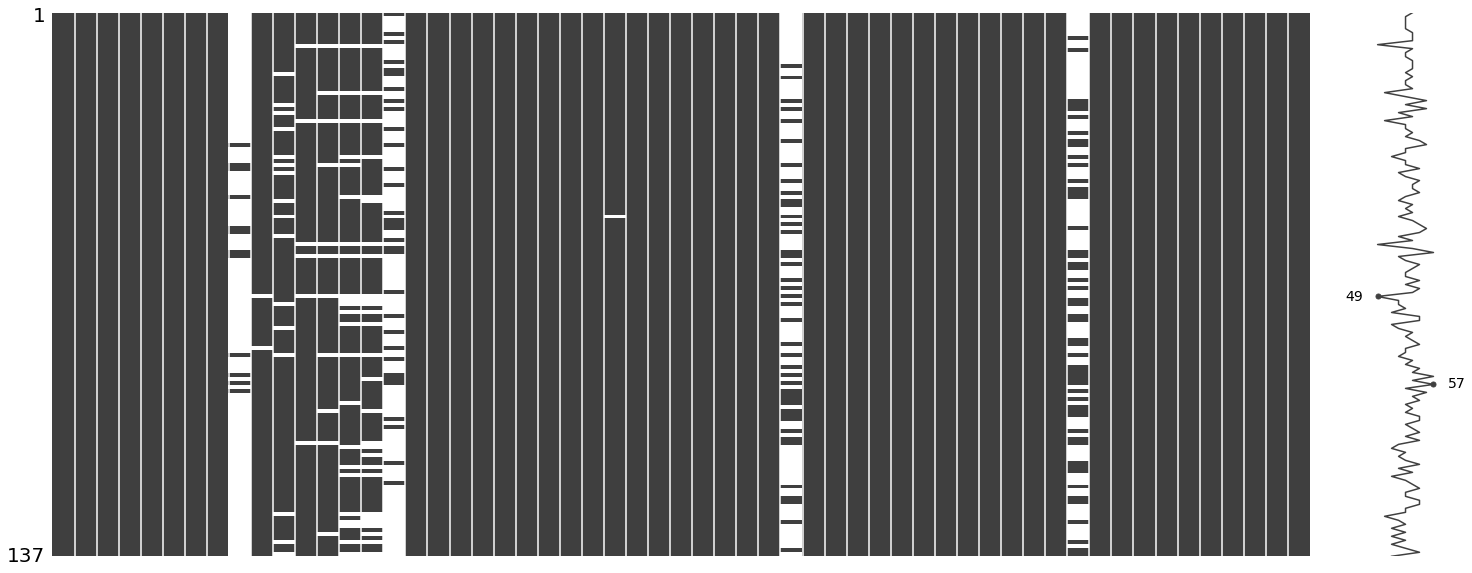

In [139]:
#Missing value visualization
ms.matrix(rb_exp2_0)

<AxesSubplot:>

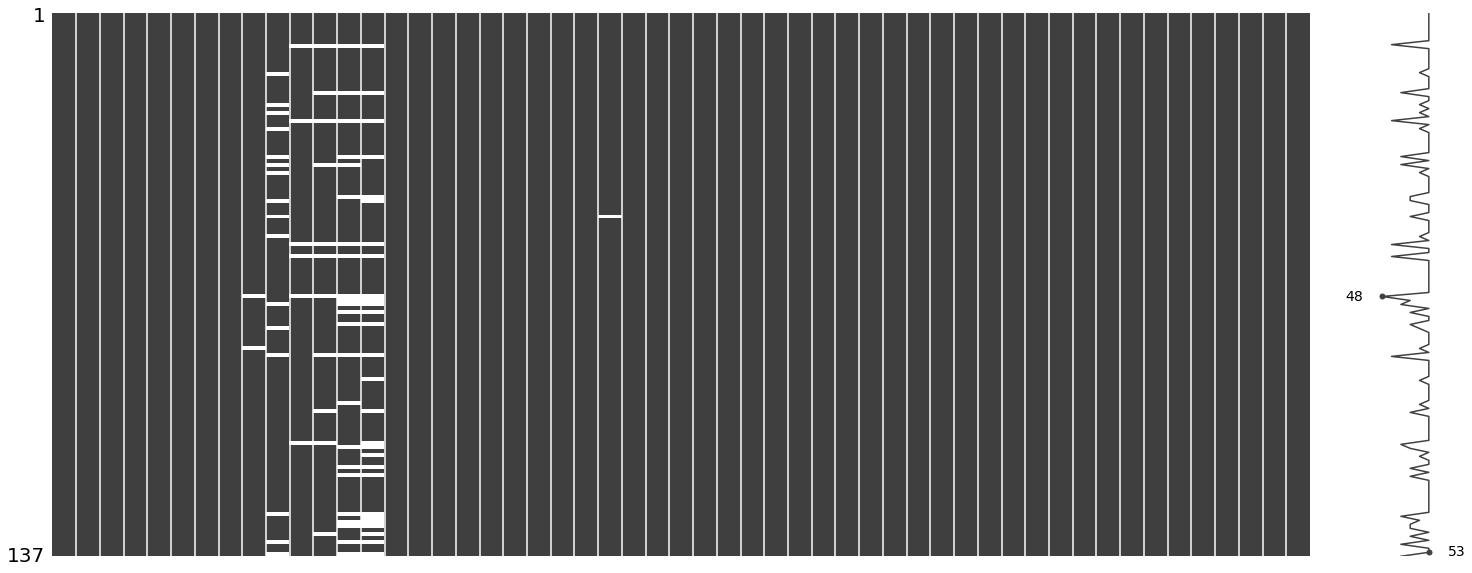

In [140]:
#Delete columns with high % of missing values
rb_exp2_1 = rb_exp2_0.drop(["Wonderlic", "60Yd Shuttle", "Pos_x", "Pos_y"], axis=1)
ms.matrix(rb_exp2_1)

<AxesSubplot:>

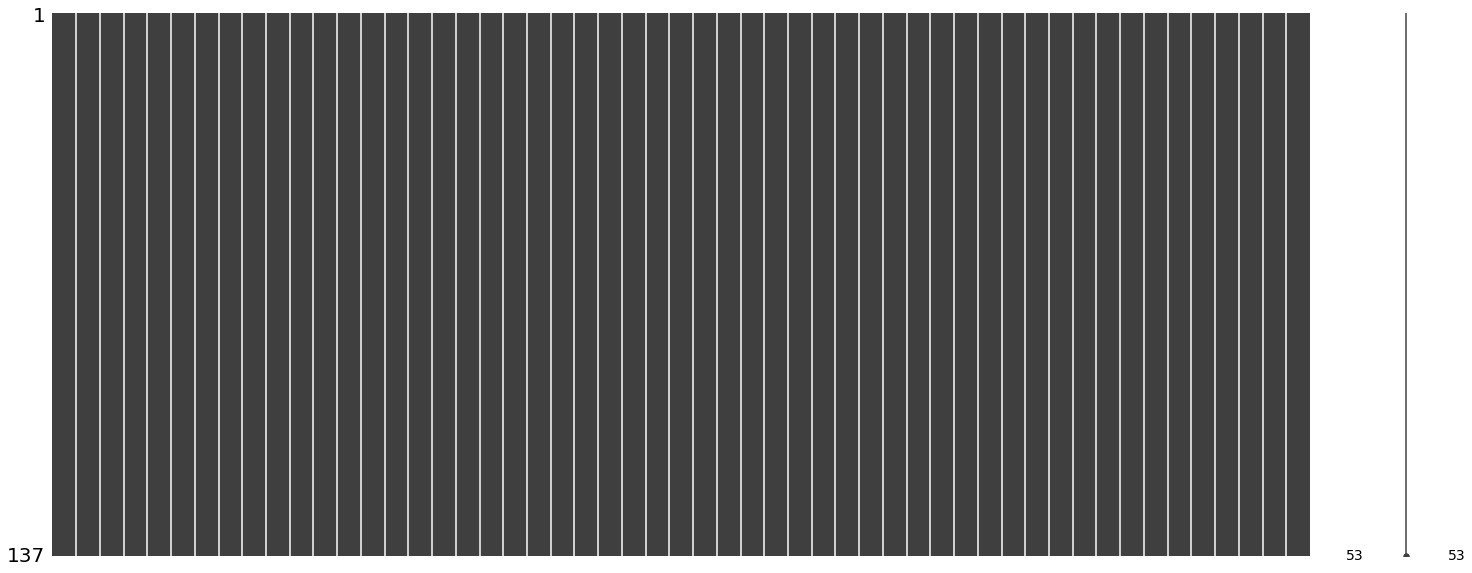

In [141]:
#Interpolate
rb_exp2_1 = rb_exp2_1.sort_values('Year')
rb_exp2_1 = rb_exp2_1.interpolate(method='linear')
ms.matrix(rb_exp2_1)

In [142]:
rb_exp2_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 137 entries, 0 to 10
Data columns (total 53 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Year             137 non-null    float64
 1   Player           137 non-null    object 
 2   College          137 non-null    object 
 3   POS              137 non-null    object 
 4   Height (in)      137 non-null    float64
 5   Weight (lbs)     137 non-null    float64
 6   Hand Size (in)   137 non-null    float64
 7   Arm Length (in)  137 non-null    float64
 8   40 Yard          137 non-null    float64
 9   Bench Press      137 non-null    float64
 10  Vert Leap (in)   137 non-null    float64
 11  Broad Jump (in)  137 non-null    float64
 12  Shuttle          137 non-null    float64
 13  3Cone            137 non-null    float64
 14  School           137 non-null    object 
 15  Conf             137 non-null    object 
 16  College_G        137 non-null    int64  
 17  Rush Att         

In [143]:
#Remove irrelevant variables
rb_exp2_1 = rb_exp2_1.drop(labels=["College", "POS", "NFL_Tm_x", "NFL_Tm_y", "Age_y"], axis=1) 
rb_exp2_1.info()
rb_exp2_1.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 137 entries, 0 to 10
Data columns (total 48 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Year             137 non-null    float64
 1   Player           137 non-null    object 
 2   Height (in)      137 non-null    float64
 3   Weight (lbs)     137 non-null    float64
 4   Hand Size (in)   137 non-null    float64
 5   Arm Length (in)  137 non-null    float64
 6   40 Yard          137 non-null    float64
 7   Bench Press      137 non-null    float64
 8   Vert Leap (in)   137 non-null    float64
 9   Broad Jump (in)  137 non-null    float64
 10  Shuttle          137 non-null    float64
 11  3Cone            137 non-null    float64
 12  School           137 non-null    object 
 13  Conf             137 non-null    object 
 14  College_G        137 non-null    int64  
 15  Rush Att         137 non-null    int64  
 16  Rush Yds▼        137 non-null    int64  
 17  Rush Avg         

,Year,Height (in),Weight (lbs),Hand Size (in),Arm Length (in),40 Yard,Bench Press,Vert Leap (in),Broad Jump (in),Shuttle,...,NFL_G_y,NFL_GS_y,NFL_Att_y,NFL_Yds_y,NFL_TD_y,NFL_1D_y,NFL_Lng_y,NFL_Y/A_y,NFL_Y/G_y,Fmb_y
count,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,...,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000
mean,2015.394161,70.421241,214.364964,9.227080,30.992482,4.535839,19.594891,34.669708,119.846715,4.277701,...,11.255474,4.489051,7.867737,32.327299,0.232628,1.690365,30.284672,3.987591,32.329197,0.095912
std,2.873197,1.719380,11.703365,0.463688,1.087870,0.083810,4.373765,3.050424,4.993953,0.134382,...,4.424247,5.563955,5.992466,27.067292,0.245343,1.500124,21.113123,1.326453,27.065493,0.129385
min,2011.000000,65.880000,184.000000,8.250000,28.000000,4.340000,10.000000,28.500000,107.000000,3.950000,...,1.000000,0.000000,0.100000,-1.000000,0.000000,0.000000,1.000000,-0.100000,-1.000000,0.000000
25%,2013.000000,69.250000,207.000000,8.880000,30.250000,4.480000,17.000000,33.000000,116.500000,4.190000,...,8.000000,0.000000,2.500000,7.670000,0.000000,0.400000,15.000000,3.300000,7.700000,0.000000
50%,2015.000000,70.500000,214.000000,9.250000,31.000000,4.540000,19.000000,34.500000,120.000000,4.280000,...,12.000000,1.000000,6.200000,26.400000,0.170000,1.330000,24.000000,4.000000,26.400000,0.060000
75%,2018.000000,71.630000,222.000000,9.500000,31.630000,4.600000,22.000000,36.500000,123.000000,4.350000,...,15.000000,9.000000,12.900000,54.900000,0.380000,2.700000,45.000000,4.600000,54.900000,0.150000
max,2020.000000,74.630000,247.000000,10.380000,33.750000,4.760000,31.000000,43.000000,132.000000,4.620000,...,17.000000,17.000000,24.200000,106.500000,1.060000,6.290000,89.000000,9.500000,106.500000,1.000000


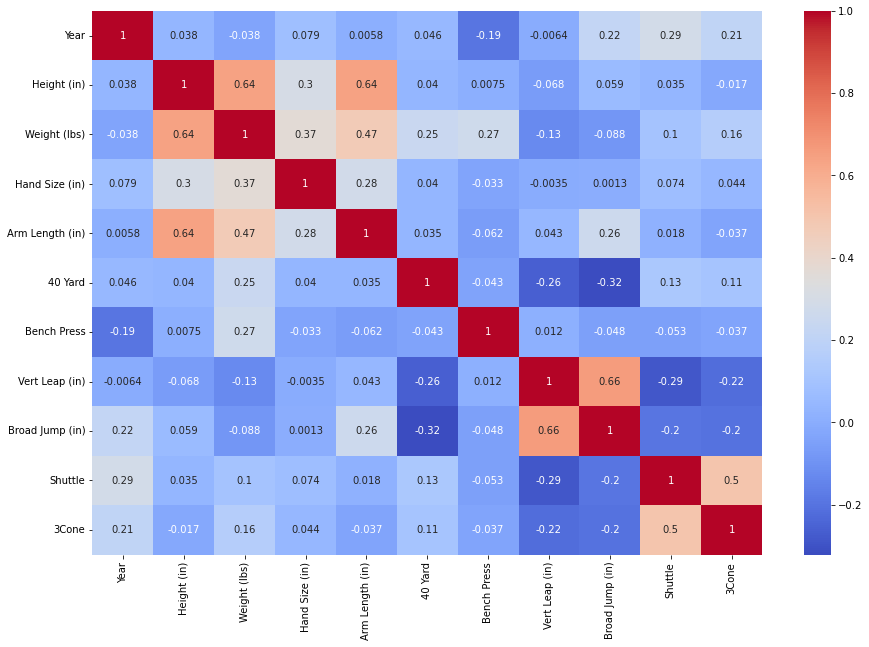

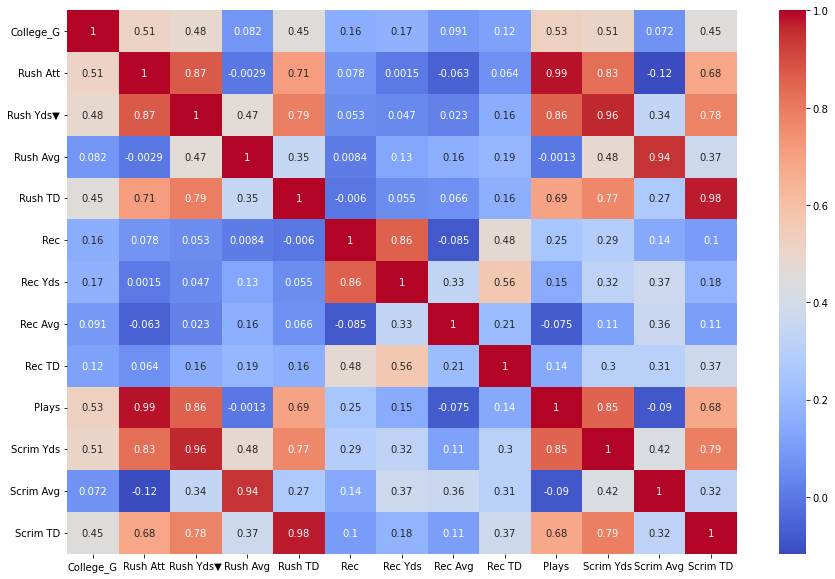

In [144]:
#Split data to determine correlation
combine_all = rb_exp2_1[['Year',
 'Player',
 'Height (in)',
 'Weight (lbs)',
 'Hand Size (in)',
 'Arm Length (in)',
 '40 Yard',
 'Bench Press',
 'Vert Leap (in)',
 'Broad Jump (in)',
 'Shuttle',
 '3Cone']]
college_all = rb_exp2_1[['School',
 'Conf',
 'College_G',
 'Rush Att',
 'Rush Yds▼',
 'Rush Avg',
 'Rush TD',
 'Rec',
 'Rec Yds',
 'Rec Avg',
 'Rec TD',
 'Plays',
 'Scrim Yds',
 'Scrim Avg',
 'Scrim TD']]

#Look into correlations
plt.figure(figsize=(15,10))
sns.heatmap(combine_all.corr(), annot=True, cmap='coolwarm')
plt.show()

plt.figure(figsize=(15,10))
sns.heatmap(college_all.corr(), annot=True, cmap='coolwarm')
plt.show()

In [145]:
#Which college/combine variables are redundant?
rb_exp2_1 = rb_exp2_1[['Year',
 'Player',
 'Height (in)',
 'Weight (lbs)',
 'Hand Size (in)',
 'Arm Length (in)',
 '40 Yard',
 'Bench Press',
 'Vert Leap (in)',
 'Broad Jump (in)',
 'Shuttle',
 '3Cone',
 'School',
 'Conf',
 'College_G',
 'Rush Att',
 'Rush Yds▼',
 'Rush Avg',
 'Rush TD',
 'Rec',
 'Rec Yds',
 'Rec Avg',
 'Rec TD',
 'Age_x',
 'NFL_G_x',
 'NFL_GS_x',
 'NFL_Att_x',
 'NFL_Yds_x',
 'NFL_TD_x',
 'NFL_1D_x',
 'NFL_Lng_x',
 'NFL_Y/A_x',
 'NFL_Y/G_x',
 'Fmb_x',
 'NFL_G_y',
 'NFL_GS_y',
 'NFL_Att_y',
 'NFL_Yds_y',
 'NFL_TD_y',
 'NFL_1D_y',
 'NFL_Lng_y',
 'NFL_Y/A_y',
 'NFL_Y/G_y',
 'Fmb_y']]

In [146]:
#Count values in categorical columns
rb_exp2_1['School'].value_counts()

LSU                  6
Alabama              6
Notre Dame           5
Wisconsin            5
Georgia              4
                    ..
Boston College       1
Purdue               1
Central Michigan     1
Florida              1
Appalachian State    1
Name: School, Length: 70, dtype: int64

In [147]:
#Count values in catagorical columns
rb_exp2_1['Conf'].value_counts()

SEC         33
Big Ten     20
ACC         19
Pac-12      18
Big 12      13
MWC          8
Ind          6
Big East     4
MAC          4
Sun Belt     3
CUSA         3
Pac-10       2
WAC          2
American     2
Name: Conf, dtype: int64

In [148]:
#remove 'School' and use one-hot encoding for 'Conf'
rb_exp2_1 = rb_exp2_1.drop(labels=["School"], axis=1)
rb_exp2_1 = pd.get_dummies(rb_exp2_1, columns=['Conf'], drop_first=True)
rb_exp2_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 137 entries, 0 to 10
Data columns (total 55 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Year             137 non-null    float64
 1   Player           137 non-null    object 
 2   Height (in)      137 non-null    float64
 3   Weight (lbs)     137 non-null    float64
 4   Hand Size (in)   137 non-null    float64
 5   Arm Length (in)  137 non-null    float64
 6   40 Yard          137 non-null    float64
 7   Bench Press      137 non-null    float64
 8   Vert Leap (in)   137 non-null    float64
 9   Broad Jump (in)  137 non-null    float64
 10  Shuttle          137 non-null    float64
 11  3Cone            137 non-null    float64
 12  College_G        137 non-null    int64  
 13  Rush Att         137 non-null    int64  
 14  Rush Yds▼        137 non-null    int64  
 15  Rush Avg         137 non-null    float64
 16  Rush TD          137 non-null    int64  
 17  Rec              

In [149]:
#Rename
rb_exp2_1.rename(columns = {'Age_x':'Age1'}, inplace = True)
rb_exp2_1.rename(columns = {'NFL_G_x':'NFL_G1'}, inplace = True)
rb_exp2_1.rename(columns = {'NFL_GS_x':'NFL_GS1'}, inplace = True)
rb_exp2_1.rename(columns = {'NFL_Att_x':'NFL_Att1'}, inplace = True)
rb_exp2_1.rename(columns = {'NFL_Yds_x':'NFL_Yds1'}, inplace = True)
rb_exp2_1.rename(columns = {'NFL_TD_x':'NFL_TD1'}, inplace = True)
rb_exp2_1.rename(columns = {'NFL_1D_x':'NFL_1D1'}, inplace = True)
rb_exp2_1.rename(columns = {'NFL_Lng_x':'NFL_Lng1'}, inplace = True)
rb_exp2_1.rename(columns = {'NFL_Y/A_x':'NFL_Y/A1'}, inplace = True)
rb_exp2_1.rename(columns = {'NFL_Y/G_x':'NFL_Y/G1'}, inplace = True)
rb_exp2_1.rename(columns = {'Fmb_x':'Fmb1'}, inplace = True)

rb_exp2_2 = rb_exp2_1

In [150]:
#Rename
rb_exp2_2.rename(columns = {'NFL_G_y':'NFL_G2'}, inplace = True)
rb_exp2_2.rename(columns = {'NFL_GS_y':'NFL_GS2'}, inplace = True)
rb_exp2_2.rename(columns = {'NFL_Att_y':'NFL_Att2'}, inplace = True)
rb_exp2_2.rename(columns = {'NFL_Yds_y':'NFL_Yds2'}, inplace = True)
rb_exp2_2.rename(columns = {'NFL_TD_y':'NFL_TD2'}, inplace = True)
rb_exp2_2.rename(columns = {'NFL_1D_y':'NFL_1D2'}, inplace = True)
rb_exp2_2.rename(columns = {'NFL_Lng_y':'NFL_Lng2'}, inplace = True)
rb_exp2_2.rename(columns = {'NFL_Y/A_y':'NFL_Y/A2'}, inplace = True)
rb_exp2_2.rename(columns = {'NFL_Y/G_y':'NFL_Y/G2'}, inplace = True)
rb_exp2_2.rename(columns = {'Fmb_y':'Fmb2'}, inplace = True)

rb_exp2_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 137 entries, 0 to 10
Data columns (total 55 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Year             137 non-null    float64
 1   Player           137 non-null    object 
 2   Height (in)      137 non-null    float64
 3   Weight (lbs)     137 non-null    float64
 4   Hand Size (in)   137 non-null    float64
 5   Arm Length (in)  137 non-null    float64
 6   40 Yard          137 non-null    float64
 7   Bench Press      137 non-null    float64
 8   Vert Leap (in)   137 non-null    float64
 9   Broad Jump (in)  137 non-null    float64
 10  Shuttle          137 non-null    float64
 11  3Cone            137 non-null    float64
 12  College_G        137 non-null    int64  
 13  Rush Att         137 non-null    int64  
 14  Rush Yds▼        137 non-null    int64  
 15  Rush Avg         137 non-null    float64
 16  Rush TD          137 non-null    int64  
 17  Rec              

In [151]:
column_headers = list(rb_exp2_2.columns.values)
print(column_headers)

['Year', 'Player', 'Height (in)', 'Weight (lbs)', 'Hand Size (in)', 'Arm Length (in)', '40 Yard', 'Bench Press', 'Vert Leap (in)', 'Broad Jump (in)', 'Shuttle', '3Cone', 'College_G', 'Rush Att', 'Rush Yds▼', 'Rush Avg', 'Rush TD', 'Rec', 'Rec Yds', 'Rec Avg', 'Rec TD', 'Age1', 'NFL_G1', 'NFL_GS1', 'NFL_Att1', 'NFL_Yds1', 'NFL_TD1', 'NFL_1D1', 'NFL_Lng1', 'NFL_Y/A1', 'NFL_Y/G1', 'Fmb1', 'NFL_G2', 'NFL_GS2', 'NFL_Att2', 'NFL_Yds2', 'NFL_TD2', 'NFL_1D2', 'NFL_Lng2', 'NFL_Y/A2', 'NFL_Y/G2', 'Fmb2', 'Conf_American', 'Conf_Big 12', 'Conf_Big East', 'Conf_Big Ten', 'Conf_CUSA', 'Conf_Ind', 'Conf_MAC', 'Conf_MWC', 'Conf_Pac-10', 'Conf_Pac-12', 'Conf_SEC', 'Conf_Sun Belt', 'Conf_WAC']


In [152]:
column_names = ['Year', 'Player', 'Height (in)', 'Weight (lbs)', 
                'Hand Size (in)', 'Arm Length (in)', '40 Yard', 
                'Bench Press', 'Vert Leap (in)', 'Broad Jump (in)', 
                'Shuttle', '3Cone', 'College_G', 'Rush Att', 'Rush Yds▼',
                'Rush Avg', 'Rush TD', 'Rec', 'Rec Yds', 'Rec Avg', 
                'Rec TD', 'Conf_American', 'Conf_Big 12', 'Conf_Big East',
                'Conf_Big Ten', 'Conf_CUSA', 'Conf_Ind', 'Conf_MAC',
                'Conf_MWC', 'Conf_Pac-10', 'Conf_Pac-12', 'Conf_SEC', 'Conf_Sun Belt',
                'Conf_WAC', 'Age1', 'NFL_G1', 'NFL_GS1', 'NFL_Att1', 'NFL_Yds1', 
                'NFL_TD1', 'NFL_1D1', 'NFL_Lng1', 'NFL_Y/A1', 'NFL_Y/G1',
                'Fmb1', 'NFL_G2', 'NFL_GS2', 'NFL_Att2', 'NFL_Yds2', 'NFL_TD2',
                'NFL_1D2', 'NFL_Lng2', 'NFL_Y/A2', 'NFL_Y/G2', 'Fmb2']
rb_exp2_2 = rb_exp2_2.reindex(columns=column_names)
rb_exp2_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 137 entries, 0 to 10
Data columns (total 55 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Year             137 non-null    float64
 1   Player           137 non-null    object 
 2   Height (in)      137 non-null    float64
 3   Weight (lbs)     137 non-null    float64
 4   Hand Size (in)   137 non-null    float64
 5   Arm Length (in)  137 non-null    float64
 6   40 Yard          137 non-null    float64
 7   Bench Press      137 non-null    float64
 8   Vert Leap (in)   137 non-null    float64
 9   Broad Jump (in)  137 non-null    float64
 10  Shuttle          137 non-null    float64
 11  3Cone            137 non-null    float64
 12  College_G        137 non-null    int64  
 13  Rush Att         137 non-null    int64  
 14  Rush Yds▼        137 non-null    int64  
 15  Rush Avg         137 non-null    float64
 16  Rush TD          137 non-null    int64  
 17  Rec              

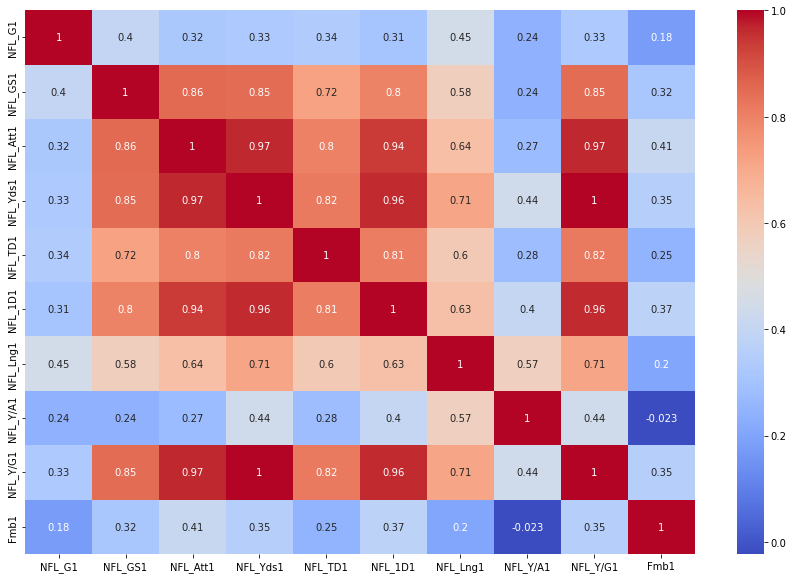

In [153]:
#Plot correlation of NFL variables
NFL_all = rb_exp2_2[['NFL_G1',
 'NFL_GS1',
 'NFL_Att1',
 'NFL_Yds1',
 'NFL_TD1',
 'NFL_1D1',
 'NFL_Lng1',
 'NFL_Y/A1',
 'NFL_Y/G1',
 'Fmb1']]

plt.figure(figsize=(15,10))
sns.heatmap(NFL_all.corr(), annot=True, cmap='coolwarm')
plt.show()

In [154]:
#Which NFL variables are redundant?
rb_exp2 = rb_exp2_2.drop(["NFL_Att1","NFL_Att2", "NFL_Yds1","NFL_Yds2", "NFL_1D1","NFL_1D2",
                           "NFL_Yds1","NFL_Yds2"], axis=1)
rb_exp2.info()
rb_exp2.to_excel('rb_exp2.xlsx', sheet_name='sheet1', index=False)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 137 entries, 0 to 10
Data columns (total 49 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Year             137 non-null    float64
 1   Player           137 non-null    object 
 2   Height (in)      137 non-null    float64
 3   Weight (lbs)     137 non-null    float64
 4   Hand Size (in)   137 non-null    float64
 5   Arm Length (in)  137 non-null    float64
 6   40 Yard          137 non-null    float64
 7   Bench Press      137 non-null    float64
 8   Vert Leap (in)   137 non-null    float64
 9   Broad Jump (in)  137 non-null    float64
 10  Shuttle          137 non-null    float64
 11  3Cone            137 non-null    float64
 12  College_G        137 non-null    int64  
 13  Rush Att         137 non-null    int64  
 14  Rush Yds▼        137 non-null    int64  
 15  Rush Avg         137 non-null    float64
 16  Rush TD          137 non-null    int64  
 17  Rec              

In [155]:
#Determine Variables
y = rb_exp2[['NFL_Y/A2']]
x = rb_exp2.drop(['Year','Player', 'NFL_G2', 'NFL_GS2', 'NFL_TD2', 'NFL_Lng2', 'NFL_Y/A2', 'NFL_Y/G2', 'Fmb2'], axis=1)
x.head()

,Height (in),Weight (lbs),Hand Size (in),Arm Length (in),40 Yard,Bench Press,Vert Leap (in),Broad Jump (in),Shuttle,3Cone,...,Conf_Sun Belt,Conf_WAC,Age1,NFL_G1,NFL_GS1,NFL_TD1,NFL_Lng1,NFL_Y/A1,NFL_Y/G1,Fmb1
0,72.75,228.0,9.63,30.38,4.56,24.0,41.5,120.0,4.06,6.79,...,0,0,23,5,0,0.0,3,2.7,1.6,0.00
15,69.88,209.0,9.13,30.00,4.50,27.5,32.5,117.0,4.31,7.07,...,0,0,23,12,0,0.0,13,3.2,3.2,0.00
14,70.25,210.0,9.00,30.63,4.49,31.0,34.0,115.0,4.28,6.95,...,0,0,22,5,0,0.2,19,3.8,11.4,0.00
13,72.25,230.0,9.00,32.38,4.63,21.0,34.0,123.0,4.29,7.06,...,0,0,24,13,2,0.0,28,3.5,44.7,0.15
12,71.00,211.0,9.00,32.50,4.40,19.0,34.0,117.0,4.20,7.15,...,0,0,23,11,0,0.0,8,3.2,1.5,0.09


In [156]:
#Run OLS regression to find statistical significance of:
    #NFL_Y/A2
    #NFL_Y/G2
    #NFL_Lng2
    #NFL_TD2

In [157]:
X = sm.add_constant(x)
eq01 = sm.OLS(y,X).fit()
print(eq01.summary())

                            OLS Regression Results                            
Dep. Variable:               NFL_Y/A2   R-squared:                       0.312
Model:                            OLS   Adj. R-squared:                  0.025
Method:                 Least Squares   F-statistic:                     1.086
Date:                Mon, 06 Jun 2022   Prob (F-statistic):              0.364
Time:                        19:03:05   Log-Likelihood:                -207.02
No. Observations:                 137   AIC:                             496.0
Df Residuals:                      96   BIC:                             615.8
Df Model:                          40                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1398     13.024     

In [158]:
#Determine Variables
y3 = rb_exp2[['NFL_Y/G2']]
x3 = rb_exp2.drop(['Year','Player', 'NFL_G2', 'NFL_GS2', 'NFL_TD2', 'NFL_Lng2', 'NFL_Y/A2', 'NFL_Y/G2', 'Fmb2'], axis=1)


X3 = sm.add_constant(x3)
eq03 = sm.OLS(y3,X3).fit()
print(eq03.summary())

                            OLS Regression Results                            
Dep. Variable:               NFL_Y/G2   R-squared:                       0.590
Model:                            OLS   Adj. R-squared:                  0.419
Method:                 Least Squares   F-statistic:                     3.449
Date:                Mon, 06 Jun 2022   Prob (F-statistic):           3.88e-07
Time:                        19:03:05   Log-Likelihood:                -584.74
No. Observations:                 137   AIC:                             1251.
Df Residuals:                      96   BIC:                             1371.
Df Model:                          40                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              35.3495    205.165     

In [159]:
#VIF
y = rb_exp2[['NFL_Y/G2']]
x = rb_exp2.drop(['Year','Player', 'NFL_G2', 'NFL_GS2', 'NFL_TD2', 'NFL_Lng2', 'NFL_Y/A2', 'NFL_Y/G2', 'Fmb2'], axis=1)
X = sm.add_constant(x)

from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["Variables"] = X.columns
vif.round(1)

,VIF Factor,Variables
0,13541.4,const
1,3.1,Height (in)
2,3.7,Weight (lbs)
3,1.4,Hand Size (in)
4,2.7,Arm Length (in)
5,1.9,40 Yard
6,1.6,Bench Press
7,3.0,Vert Leap (in)
8,3.1,Broad Jump (in)
9,2.0,Shuttle


In [160]:
#VIF high for Rush Att amd Rush Yds so remove one and check again
#VIF
y = rb_exp2[['NFL_Y/G2']]
x = rb_exp2.drop(['Rush Att', 'Year','Player', 'NFL_G2', 'NFL_GS2', 'NFL_TD2', 'NFL_Lng2', 'NFL_Y/A2', 'NFL_Y/G2', 'Fmb2'], axis=1)
X = sm.add_constant(x)

from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["Variables"] = X.columns
vif.round(1)

,VIF Factor,Variables
0,13541.3,const
1,3.0,Height (in)
2,3.7,Weight (lbs)
3,1.4,Hand Size (in)
4,2.7,Arm Length (in)
5,1.7,40 Yard
6,1.6,Bench Press
7,2.9,Vert Leap (in)
8,3.1,Broad Jump (in)
9,2.0,Shuttle


In [161]:
rb_exp2.head(15)

,Year,Player,Height (in),Weight (lbs),Hand Size (in),Arm Length (in),40 Yard,Bench Press,Vert Leap (in),Broad Jump (in),...,NFL_Y/A1,NFL_Y/G1,Fmb1,NFL_G2,NFL_GS2,NFL_TD2,NFL_Lng2,NFL_Y/A2,NFL_Y/G2,Fmb2
0,2011.0,Anthony Allen,72.75,228.0,9.63,30.38,4.56,24.0,41.5,120.0,...,2.7,1.6,0.00,16,0,0.06,20,3.8,3.8,0.00
15,2011.0,Johnny White,69.88,209.0,9.13,30.00,4.50,27.5,32.5,117.0,...,3.2,3.2,0.00,7,0,0.00,9,4.3,4.9,0.00
14,2011.0,Shane Vereen,70.25,210.0,9.00,30.63,4.49,31.0,34.0,115.0,...,3.8,11.4,0.00,13,1,0.23,16,4.0,19.3,0.08
13,2011.0,Daniel Thomas,72.25,230.0,9.00,32.38,4.63,21.0,34.0,123.0,...,3.5,44.7,0.15,12,0,0.33,20,3.6,27.1,0.25
12,2011.0,Da'Rel Scott,71.00,211.0,9.00,32.50,4.40,19.0,34.0,117.0,...,3.2,1.5,0.09,4,0,0.00,5,1.5,2.3,0.00
10,2011.0,Jacquizz Rodgers,65.88,196.0,8.88,30.50,4.59,13.0,33.0,113.0,...,3.6,12.8,0.06,16,0,0.06,43,3.9,22.6,0.00
9,2011.0,Stevan Ridley,71.25,225.0,9.25,31.88,4.65,18.0,36.0,118.0,...,5.1,27.6,0.06,16,12,0.75,41,4.4,78.9,0.25
8,2011.0,Bilal Powell,70.50,207.0,8.75,30.88,4.52,18.0,35.0,115.5,...,1.6,10.5,0.50,14,2,0.29,18,4.0,31.2,0.00
11,2011.0,Evan Royster,71.63,212.0,9.25,30.75,4.65,20.0,34.0,113.0,...,5.9,54.7,0.00,16,0,0.13,12,3.8,5.5,0.00
6,2011.0,Mark Ingram,69.13,215.0,9.50,30.75,4.62,21.0,31.5,113.0,...,3.9,47.4,0.10,16,5,0.31,31,3.9,37.6,0.00


In [162]:
#Run regression on all 4 dependent variables again
     #NFL_Y/G2
    #NFL_Y/A2
    #NFL_Lng2
    #NFL_TD2
#1 Determine Variables
y = rb_exp2[['NFL_Y/G2']]
x = rb_exp2.drop(['Rush Att', 'Year','Player', 'NFL_G2', 'NFL_GS2', 'NFL_TD2', 'NFL_Lng2', 'NFL_Y/A2', 'NFL_Y/G2', 'Fmb2'], axis=1)


X = sm.add_constant(x)
eq01 = sm.OLS(y,X).fit()
print(eq01.summary())

                            OLS Regression Results                            
Dep. Variable:               NFL_Y/G2   R-squared:                       0.590
Model:                            OLS   Adj. R-squared:                  0.425
Method:                 Least Squares   F-statistic:                     3.574
Date:                Mon, 06 Jun 2022   Prob (F-statistic):           2.01e-07
Time:                        19:03:06   Log-Likelihood:                -584.74
No. Observations:                 137   AIC:                             1249.
Df Residuals:                      97   BIC:                             1366.
Df Model:                          39                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              35.3027    204.108     

Regression 1 found that Rec TD, American Conference, and NFL TD from Season 1 were all statistically
significant factors in NFL Yards per Game in Season 2.

It makes sense that recieving touchdowns in college would impact rushing yards in the NFL as to be good in the NFL, you need to be able to rush and recieve. Therefor, only players that have this skill set make it to the pros. 

It is unclear to me why a player from the American conference would be more likely to have more yards/game in the NFL. After looking at the data, only 2/137 players were from the American conference. So, it must be that both of those players happen to perform well. However, I don't think it is an appropriate sample size to draw conculsions from.

Lastly, a positive correlation between NFL Season 1 touchdowns and Season 2 yards per game. I understand this to be true because if a player performs well the year before, they are expected to recieve the ball on more
plays the following year..

In [163]:
#2 Determine Variables
y = rb_exp2[['NFL_Y/A2']]
x = rb_exp2.drop(['Rush Att', 'Year','Player', 'NFL_G2', 'NFL_GS2', 'NFL_TD2', 'NFL_Lng2', 'NFL_Y/A2', 'NFL_Y/G2', 'Fmb2'], axis=1)


X = sm.add_constant(x)
eq02 = sm.OLS(y,X).fit()
print(eq02.summary())

                            OLS Regression Results                            
Dep. Variable:               NFL_Y/A2   R-squared:                       0.307
Model:                            OLS   Adj. R-squared:                  0.029
Method:                 Least Squares   F-statistic:                     1.103
Date:                Mon, 06 Jun 2022   Prob (F-statistic):              0.342
Time:                        19:03:06   Log-Likelihood:                -207.45
No. Observations:                 137   AIC:                             494.9
Df Residuals:                      97   BIC:                             611.7
Df Model:                          39                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1057     12.996     

Regression 2 found that Weight, Conference CUSA, and the SEC Conference were all statistically significant factors in NFL Yards per Attempt in Season 2. 

Weight has a negative correlation to yards per attempt. This makes sense because heavier players are used for short down situations and lighter players are used to encourage breakaway plays.

It is unclear to me why a player from the American conference would be more likely to have higher y/a in the NFL. After looking at the data, only 3/137 players were from the American conference. So, it must be that those players happen to perform well. However, I don't think it is an appropriate sample size to draw conculsions from.

Lastly, players from the SEC conference are expected to have a higher yards per carry. I attribute this to better running back talent coming out of the SEC conference. The southern schools tend to have better running back recruiting and therefore produce better professionals at this position


In [164]:
#3 Determine Variables
y = rb_exp2[['NFL_Lng2']]
x = rb_exp2.drop(['Rush Att', 'Year','Player', 'NFL_G2', 'NFL_GS2', 'NFL_TD2', 'NFL_Lng2', 'NFL_Y/A2', 'NFL_Y/G2', 'Fmb2'], axis=1)


X = sm.add_constant(x)
eq03 = sm.OLS(y,X).fit()
print(eq03.summary())

                            OLS Regression Results                            
Dep. Variable:               NFL_Lng2   R-squared:                       0.340
Model:                            OLS   Adj. R-squared:                  0.075
Method:                 Least Squares   F-statistic:                     1.282
Date:                Mon, 06 Jun 2022   Prob (F-statistic):              0.164
Time:                        19:03:06   Log-Likelihood:                -583.25
No. Observations:                 137   AIC:                             1246.
Df Residuals:                      97   BIC:                             1363.
Df Model:                          39                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             157.6298    201.894     

In [ ]:
#Regression 3 found that no variables were statistically significant factors in NFL Longest Run in Season 2.
#I was anticipating this because the chances of having a long run are low and not based on skill. 

In [165]:
#4 Determine Variables
y = rb_exp2[['NFL_TD2']]
x = rb_exp2.drop(['Rush Att', 'Year','Player', 'NFL_G2', 'NFL_GS2', 'NFL_TD2', 'NFL_Lng2', 'NFL_Y/A2', 'NFL_Y/G2', 'Fmb2'], axis=1)


X = sm.add_constant(x)
eq04 = sm.OLS(y,X).fit()
print(eq04.summary())

                            OLS Regression Results                            
Dep. Variable:                NFL_TD2   R-squared:                       0.503
Model:                            OLS   Adj. R-squared:                  0.303
Method:                 Least Squares   F-statistic:                     2.516
Date:                Mon, 06 Jun 2022   Prob (F-statistic):           0.000134
Time:                        19:03:06   Log-Likelihood:                 46.486
No. Observations:                 137   AIC:                            -12.97
Df Residuals:                      97   BIC:                             103.8
Df Model:                          39                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -1.7387      2.036     

Regression 4 found that Rec TD, American Conference, and NFL TD from Season 1 were all statistically
significant factors in NFL TD per Game in Season 2. 

It makes sense that recieving touchdowns in college would impact rushing touchdowns in the NFL as to be good in the NFL, you need to be able to rush and recieve. Therefor, only players that have this skill set make it to the pros. 

It is unclear to me why a player from the American conference would be more likely to score TDs in the NFL. 
After looking at the data, only 2/137 players were from the American conference. So, it must be that both of those players happen to perform well. However, I don't think it is an appropriate sample size to draw conculsions from.

Lastly, a positive correlation between NFL Season 1 and Season 2 touchdowns. I understand this to be true because if a player performs well the year before, they are expected to improve.